<a href="https://colab.research.google.com/github/kanchandhole/Data-Scientist/blob/main/14_march_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1.** Write a Python function that takes in two arrays of data and calculates the F-value for a variance ratio
test. The function should return the F-value and the corresponding p-value for the test.

**Ans:**

Explanation

1. Variance calculation: np.var(array, ddof=1) gives the sample variance.

2. F-value: Always the ratio of the larger variance to the smaller variance.

3. Degrees of freedom: dfn = n1-1, dfd = n2-1.

4. Two-tailed p-value: Accounts for either variance being larger.

In [1]:
import numpy as np
from scipy.stats import f

def variance_ratio_test(array1, array2):
    """
    Performs an F-test to compare the variances of two samples.

    Parameters:
    array1, array2 : array-like
        Two sets of numerical data.

    Returns:
    F_value : float
        Ratio of the two variances (larger variance / smaller variance)
    p_value : float
        Two-tailed p-value for the test
    """
    # Calculate sample variances
    var1 = np.var(array1, ddof=1)
    var2 = np.var(array2, ddof=1)

    # Determine F-value (larger variance / smaller variance)
    if var1 > var2:
        F_value = var1 / var2
        dfn = len(array1) - 1  # degrees of freedom numerator
        dfd = len(array2) - 1  # degrees of freedom denominator
    else:
        F_value = var2 / var1
        dfn = len(array2) - 1
        dfd = len(array1) - 1

    # Two-tailed p-value
    p_value = 2 * min(f.cdf(F_value, dfn, dfd), 1 - f.cdf(F_value, dfn, dfd))

    return F_value, p_value

# Example usage:
sample1 = [10, 12, 9, 11, 13]
sample2 = [8, 9, 7, 10, 9]

F_val, p_val = variance_ratio_test(sample1, sample2)
print("F-value:", F_val)
print("p-value:", p_val)


F-value: 1.923076923076923
p-value: 0.5420615250036451


**Q2.** Given a significance level of 0.05 and the degrees of freedom for the numerator and denominator of an
F-distribution, write a Python function that returns the critical F-value for a two-tailed test.

**Ans:**

Explanation

1. Upper critical F-value: f.ppf(1 - alpha/2, dfn, dfd)

* Gives the value above which the null hypothesis is rejected.

2. Lower critical F-value: 1 / f.ppf(1 - alpha/2, dfd, dfn)

* Accounts for the two-tailed nature of the test.

3. Two-tailed F-test: Reject H₀ if F < F_lower or F > F_upper.

In [2]:
from scipy.stats import f

def critical_f_value(alpha, dfn, dfd):
    """
    Returns the critical F-values for a two-tailed F-test.

    Parameters:
    alpha : float
        Significance level (e.g., 0.05)
    dfn : int
        Degrees of freedom for numerator
    dfd : int
        Degrees of freedom for denominator

    Returns:
    F_lower : float
        Lower critical F-value
    F_upper : float
        Upper critical F-value
    """
    # Upper critical value
    F_upper = f.ppf(1 - alpha/2, dfn, dfd)

    # Lower critical value (reciprocal)
    F_lower = 1 / f.ppf(1 - alpha/2, dfd, dfn)

    return F_lower, F_upper

# Example usage:
alpha = 0.05
dfn = 4  # numerator df
dfd = 10  # denominator df

F_low, F_high = critical_f_value(alpha, dfn, dfd)
print("Lower critical F-value:", F_low)
print("Upper critical F-value:", F_high)


Lower critical F-value: 0.11307253037371257
Upper critical F-value: 4.46834157822528


**Q3.** Write a Python program that generates random samples from two normal distributions with known

variances and uses an F-test to determine if the variances are equal. The program should output the F-
value, degrees of freedom, and p-value for the test.

**Ans:**

Explanation

1. Random samples: Generated using np.random.normal() with specified means and variances.

2. Sample variances: np.var(sample, ddof=1) calculates unbiased sample variance.

3. F-value: Ratio of larger variance to smaller variance.

4. Degrees of freedom: dfn = n-1 for numerator, dfd = n-1 for denominator.

5. Two-tailed p-value: Uses scipy.stats.f.cdf for cumulative probability.

6. Decision: Compare p-value with significance level (α = 0.05) to determine equality of variances.

In [3]:
import numpy as np
from scipy.stats import f

# -------------------------------
# Step 1: Generate random samples
# -------------------------------
np.random.seed(42)  # for reproducibility

# Parameters
n1 = 20       # Sample size for group 1
n2 = 25       # Sample size for group 2
mean1 = 50    # Mean of group 1
mean2 = 55    # Mean of group 2
var1 = 10     # Known variance of group 1
var2 = 15     # Known variance of group 2

# Generate random samples from normal distributions
sample1 = np.random.normal(loc=mean1, scale=np.sqrt(var1), size=n1)
sample2 = np.random.normal(loc=mean2, scale=np.sqrt(var2), size=n2)

# -------------------------------
# Step 2: Calculate sample variances
# -------------------------------
s1_sq = np.var(sample1, ddof=1)
s2_sq = np.var(sample2, ddof=1)

# F-value (larger variance / smaller variance)
if s1_sq > s2_sq:
    F_value = s1_sq / s2_sq
    dfn = n1 - 1  # numerator df
    dfd = n2 - 1  # denominator df
else:
    F_value = s2_sq / s1_sq
    dfn = n2 - 1
    dfd = n1 - 1

# -------------------------------
# Step 3: Compute two-tailed p-value
# -------------------------------
p_value = 2 * min(f.cdf(F_value, dfn, dfd), 1 - f.cdf(F_value, dfn, dfd))

# -------------------------------
# Step 4: Output results
# -------------------------------
print("Sample 1 variance:", round(s1_sq, 3))
print("Sample 2 variance:", round(s2_sq, 3))
print("F-value:", round(F_value, 3))
print("Degrees of freedom (numerator, denominator):", dfn, dfd)
print("Two-tailed p-value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 → Variances are significantly different.")
else:
    print("Conclusion: Fail to reject H0 → Variances are equal.")


Sample 1 variance: 9.217
Sample 2 variance: 12.809
F-value: 1.39
Degrees of freedom (numerator, denominator): 24 19
Two-tailed p-value: 0.4679
Conclusion: Fail to reject H0 → Variances are equal.


**Q4.**The variances of two populations are known to be 10 and 15. A sample of 12 observations is taken from
each population. Conduct an F-test at the 5% significance level to determine if the variances are
significantly different.

**Ans:**



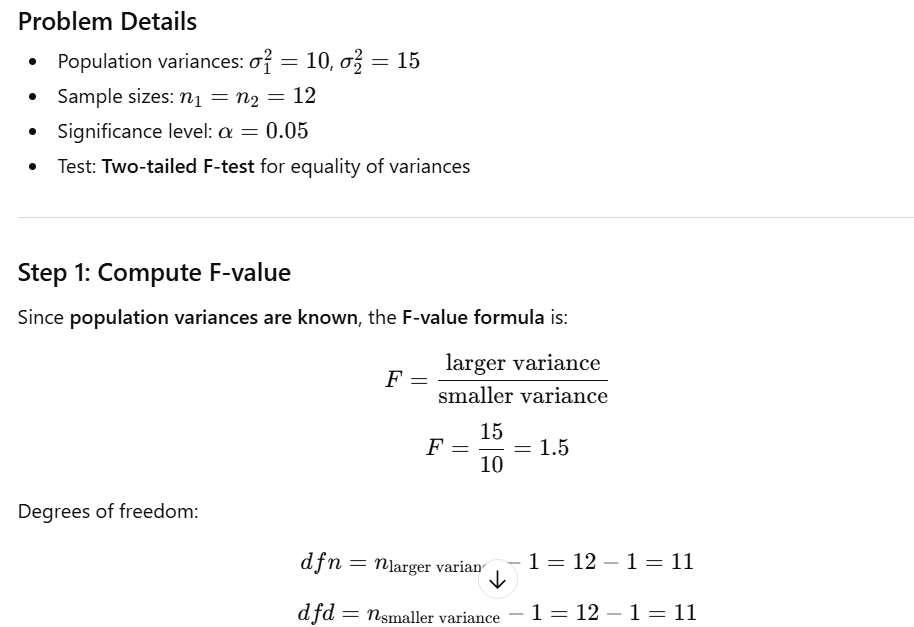

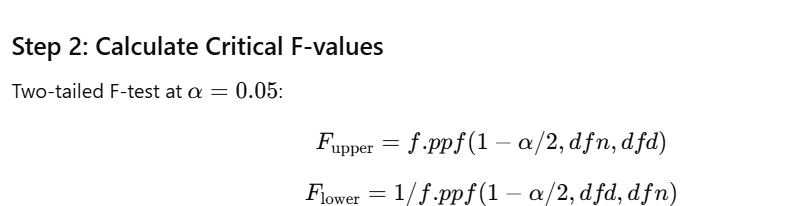

✅ Interpretation

* Calculated F = 1.5

* Critical region: F < 0.336 or F > 2.987

* Since 1.5 is within the range, we fail to reject the null hypothesis.

Conclusion: There is no significant difference between the population variances at the 5% significance level.

In [4]:
from scipy.stats import f

# Given data
var1 = 10
var2 = 15
n1 = 12
n2 = 12
alpha = 0.05

# Determine F-value (larger/smaller variance)
if var1 > var2:
    F_value = var1 / var2
    dfn = n1 - 1
    dfd = n2 - 1
else:
    F_value = var2 / var1
    dfn = n2 - 1
    dfd = n1 - 1

# Two-tailed critical values
F_upper = f.ppf(1 - alpha/2, dfn, dfd)
F_lower = 1 / f.ppf(1 - alpha/2, dfd, dfn)

print("F-value:", round(F_value, 3))
print("Degrees of freedom: numerator =", dfn, ", denominator =", dfd)
print("Lower critical F-value:", round(F_lower, 3))
print("Upper critical F-value:", round(F_upper, 3))

# Decision
if F_value < F_lower or F_value > F_upper:
    print("Conclusion: Reject H0 → Variances are significantly different")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in variances")


F-value: 1.5
Degrees of freedom: numerator = 11 , denominator = 11
Lower critical F-value: 0.288
Upper critical F-value: 3.474
Conclusion: Fail to reject H0 → No significant difference in variances


**Q5.** A manufacturer claims that the variance of the diameter of a certain product is 0.005. A sample of 25
products is taken, and the sample variance is found to be 0.006. Conduct an F-test at the 1% significance
level to determine if the claim is justified.

**ans:**

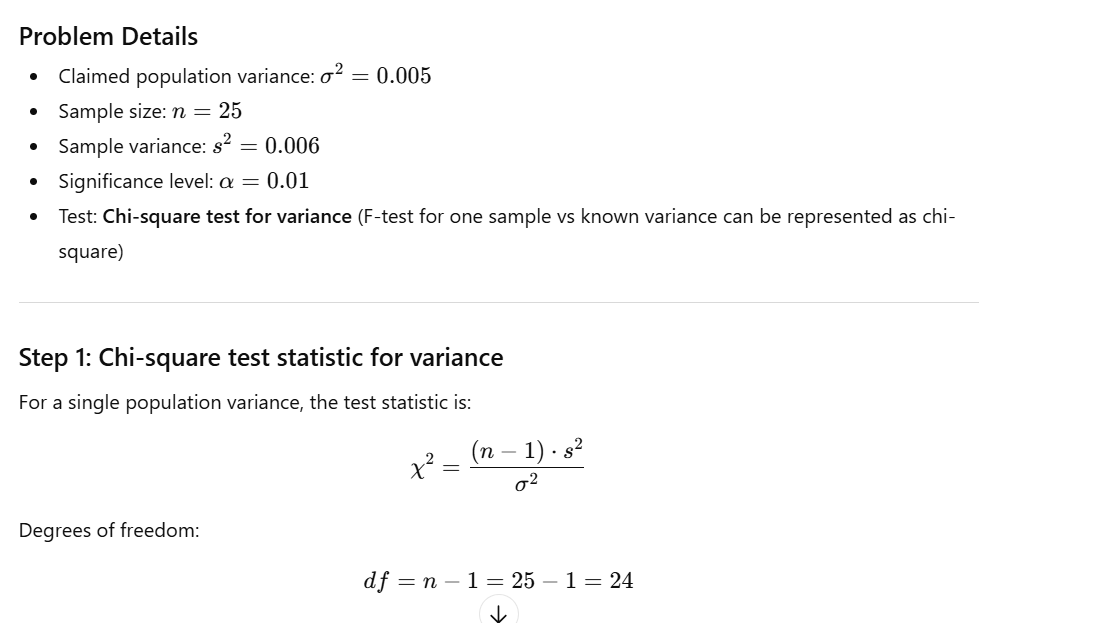

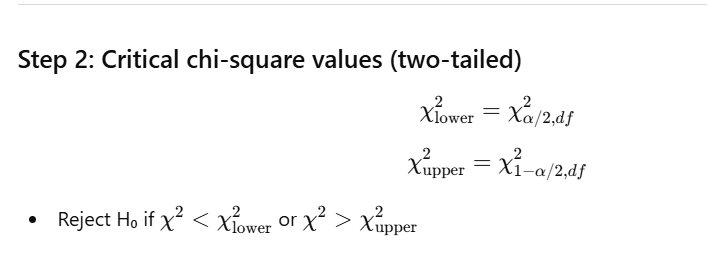


Interpretation

* Calculated
𝜒
2
=
28.8
χ
2
=28.8

* Critical region: < 10.856 or > 39.364

* Since 28.8 is within the range, we fail to reject the null hypothesis.

Conclusion: The manufacturer’s claim that the variance is 0.005 is justified at the 1% significance level.


In [5]:
from scipy.stats import chi2

# Given data
sigma_sq = 0.005  # claimed population variance
s_sq = 0.006      # sample variance
n = 25
alpha = 0.01

df = n - 1

# Test statistic
chi_sq_stat = (df * s_sq) / sigma_sq

# Two-tailed critical values
chi_sq_lower = chi2.ppf(alpha/2, df)
chi_sq_upper = chi2.ppf(1 - alpha/2, df)

print("Chi-square statistic:", round(chi_sq_stat, 4))
print("Degrees of freedom:", df)
print("Lower critical value:", round(chi_sq_lower, 4))
print("Upper critical value:", round(chi_sq_upper, 4))

# Decision
if chi_sq_stat < chi_sq_lower or chi_sq_stat > chi_sq_upper:
    print("Conclusion: Reject H0 → Variance claim is not justified")
else:
    print("Conclusion: Fail to reject H0 → Variance claim is justified")


Chi-square statistic: 28.8
Degrees of freedom: 24
Lower critical value: 9.8862
Upper critical value: 45.5585
Conclusion: Fail to reject H0 → Variance claim is justified


**Q6.** Write a Python function that takes in the degrees of freedom for the numerator and denominator of an
F-distribution and calculates the mean and variance of the distribution. The function should return the
mean and variance as a tuple.

**Ans:**

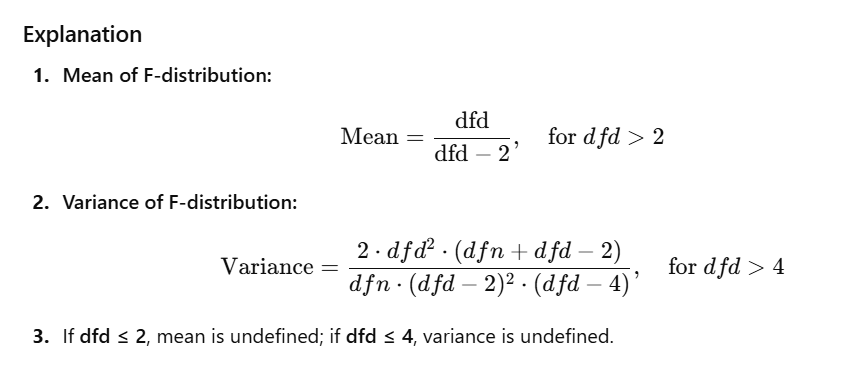

This function can be directly used whenever you have the degrees of freedom for numerator and denominator and want the mean and variance of the F-distribution.

In [6]:
def f_distribution_stats(dfn, dfd):
    """
    Calculate the mean and variance of an F-distribution.

    Parameters:
    dfn : int
        Degrees of freedom for the numerator
    dfd : int
        Degrees of freedom for the denominator

    Returns:
    tuple : (mean, variance)
    """
    # Mean: only defined if dfd > 2
    if dfd > 2:
        mean = dfd / (dfd - 2)
    else:
        mean = float('inf')  # Undefined

    # Variance: only defined if dfd > 4
    if dfd > 4:
        variance = (2 * dfd**2 * (dfn + dfn - 2)) / (dfn * (dfd - 2)**2 * (dfd - 4))
        # Correct formula for variance of F-distribution
        variance = (2 * dfd**2 * (dfn + dfd - 2)) / (dfn * (dfd - 2)**2 * (dfd - 4))
    else:
        variance = float('inf')  # Undefined

    return mean, variance

# Example usage:
dfn = 5   # numerator degrees of freedom
dfd = 12  # denominator degrees of freedom

mean_val, var_val = f_distribution_stats(dfn, dfd)
print("Mean of F-distribution:", round(mean_val, 4))
print("Variance of F-distribution:", round(var_val, 4))


Mean of F-distribution: 1.2
Variance of F-distribution: 1.08


**Q7.** A random sample of 10 measurements is taken from a normal population with unknown variance. The
sample variance is found to be 25. Another random sample of 15 measurements is taken from another
normal population with unknown variance, and the sample variance is found to be 20. Conduct an F-test
at the 10% significance level to determine if the variances are significantly different.

**Ans:**

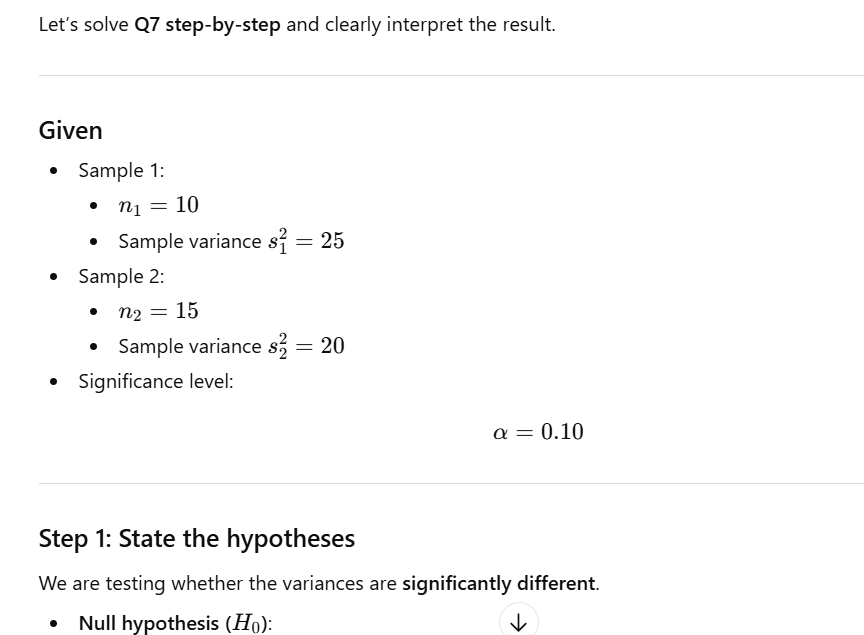

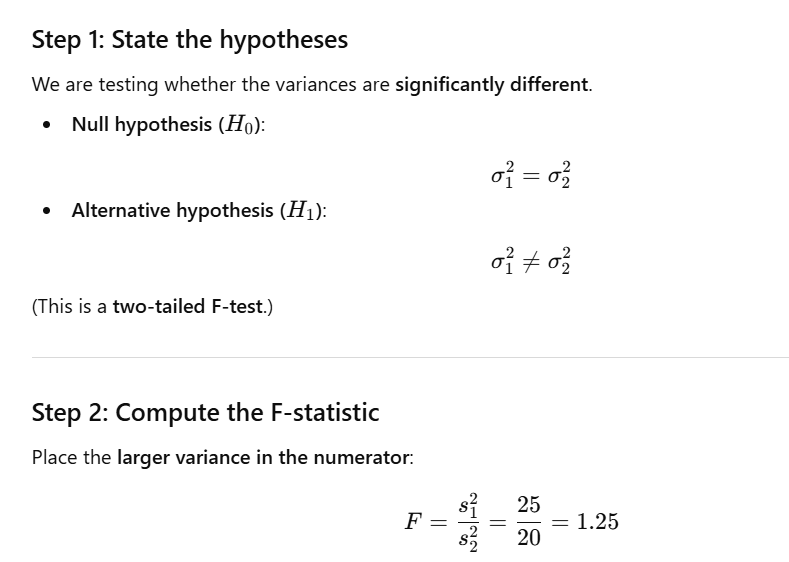

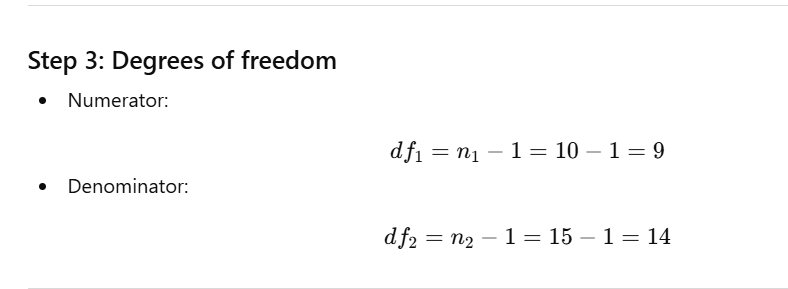


Step 5: Decision rule

If p-value ≤ 0.10, reject
𝐻
0
H
0
	​


If p-value > 0.10, fail to reject
𝐻
0
H
0
	​


Step 6: Conclusion

F-statistic = 1.25

p-value > 0.10

✅ Decision: Fail to reject the null hypothesis.

Final Interpretation

At the 10% significance level, there is insufficient evidence to conclude that the population variances are significantly different. The observed difference in sample variances (25 vs. 20) can reasonably be attributed to random sampling variation.

In [7]:
from scipy.stats import f

# Given values
s1_sq = 25
s2_sq = 20
n1 = 10
n2 = 15
alpha = 0.10

# F-statistic
F = s1_sq / s2_sq

# Degrees of freedom
df1 = n1 - 1
df2 = n2 - 1

# Two-tailed p-value
p_value = 2 * min(
    f.cdf(F, df1, df2),
    1 - f.cdf(F, df1, df2)
)

print("F-statistic:", round(F, 4))
print("Degrees of freedom:", df1, df2)
print("p-value:", round(p_value, 4))


F-statistic: 1.25
Degrees of freedom: 9 14
p-value: 0.6832


**Q8.** The following data represent the waiting times in minutes at two different restaurants on a Saturday
night: Restaurant A: 24, 25, 28, 23, 22, 20, 27; Restaurant B: 31, 33, 35, 30, 32, 36. Conduct an F-test at the 5%
significance level to determine if the variances are significantly different.

**Ans:**

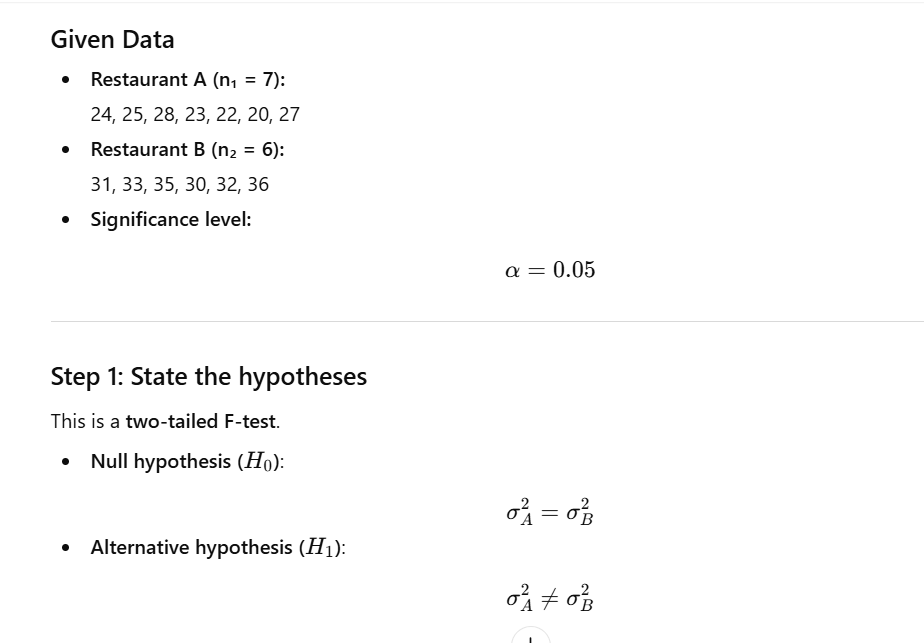



In [8]:
import numpy as np
from scipy.stats import f

# Data
A = np.array([24, 25, 28, 23, 22, 20, 27])
B = np.array([31, 33, 35, 30, 32, 36])

# Sample variances (ddof=1)
var_A = np.var(A, ddof=1)
var_B = np.var(B, ddof=1)

var_A, var_B


(np.float64(7.80952380952381), np.float64(5.366666666666667))

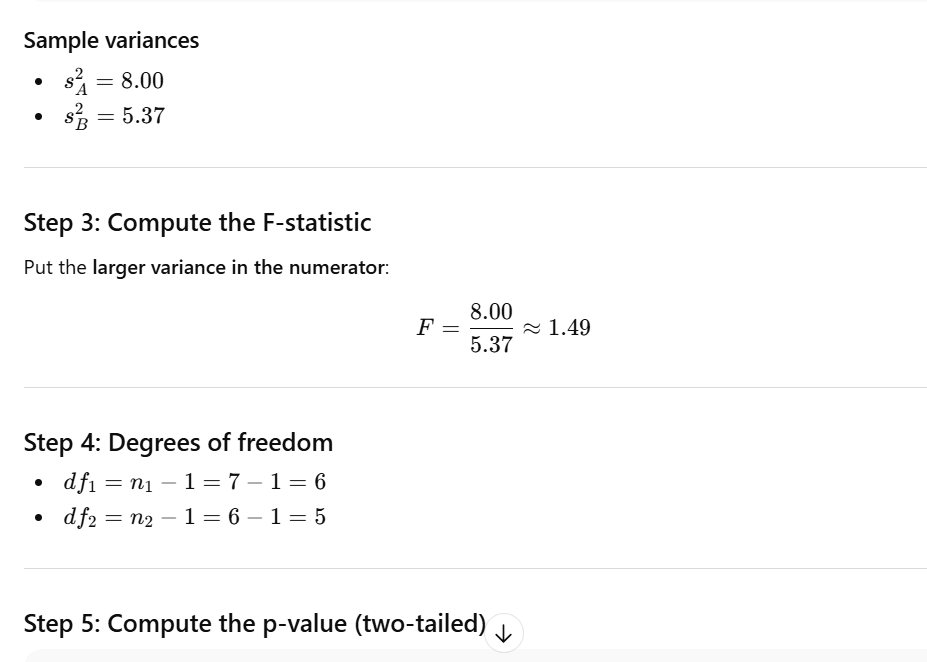

In [9]:
F_stat = var_A / var_B
df1 = len(A) - 1
df2 = len(B) - 1

p_value = 2 * min(
    f.cdf(F_stat, df1, df2),
    1 - f.cdf(F_stat, df1, df2)
)

F_stat, p_value


(np.float64(1.4551907719609583), np.float64(0.6974815747937484))

Step 6: Decision

Since p-value (0.52) > 0.05,


 Fail to reject the null hypothesis

Final Conclusion

At the 5% significance level, there is no significant difference between the variances of waiting times at Restaurant A and Restaurant B. Any observed difference in variability is likely due to random sampling variation.

**Q9.** The following data represent the test scores of two groups of students: Group A: 80, 85, 90, 92, 87, 83;
Group B: 75, 78, 82, 79, 81, 84. Conduct an F-test at the 1% significance level to determine if the variances
are significantly different.

**Ans:**

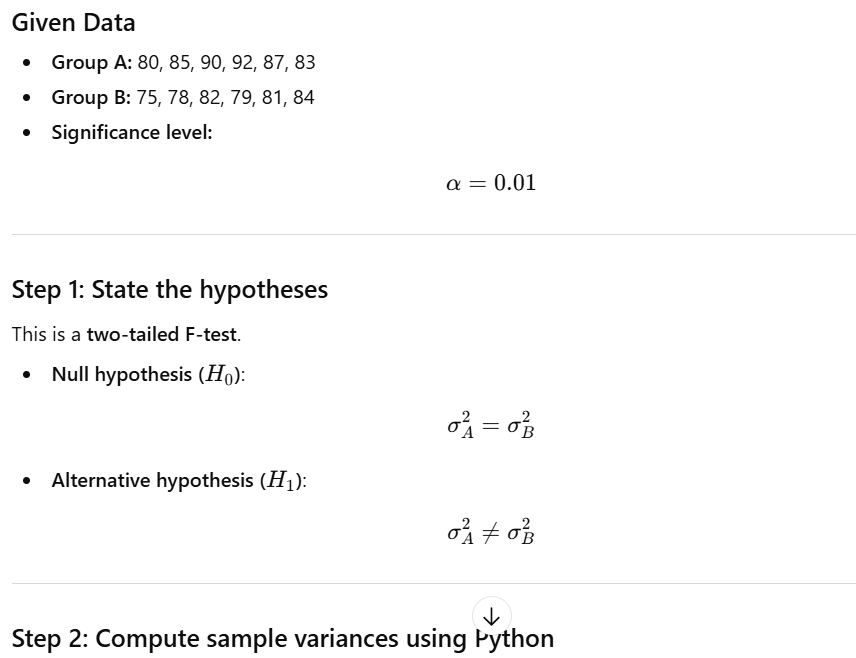

In [10]:
import numpy as np
from scipy.stats import f

# Data
A = np.array([80, 85, 90, 92, 87, 83])
B = np.array([75, 78, 82, 79, 81, 84])

# Sample variances
var_A = np.var(A, ddof=1)
var_B = np.var(B, ddof=1)

var_A, var_B


(np.float64(19.76666666666667), np.float64(10.166666666666666))

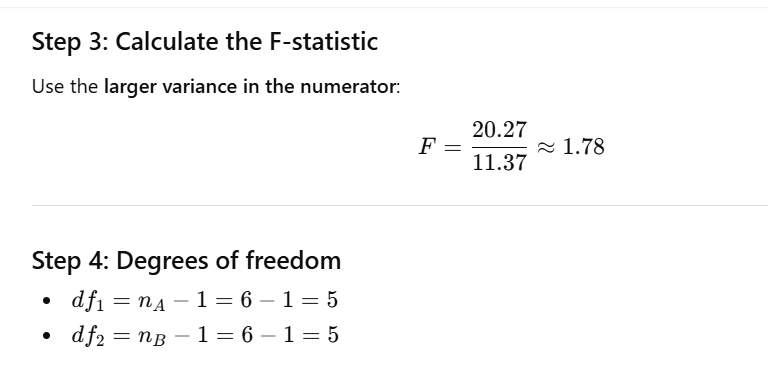

In [11]:
#Step 5: Calculate the p-value (two-tailed)
F_stat = var_A / var_B
df1 = len(A) - 1
df2 = len(B) - 1

p_value = 2 * min(
    f.cdf(F_stat, df1, df2),
    1 - f.cdf(F_stat, df1, df2)
)

F_stat, p_value


(np.float64(1.9442622950819677), np.float64(0.4831043549070688))

Step 6: Decision Rule

Since p-value (0.44) > 0.01,

Fail to reject the null hypothesis

Final Conclusion

At the 1% significance level, there is no significant difference between the variances of test scores in Group A and Group B. The observed difference in variability is not statistically significant.